<a href="https://colab.research.google.com/github/sarikasea/Knowledge-Graphs-Using-NetworkX/blob/main/knowledge_graphs_using_NetworkX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is a Knowledge Graph?

A knowledge graphis a way to represent information using nodes (entities) and edges (relationships). Think of it as connecting dots (nodes) with lines (edges) where:

Nodes represent concepts, topics, or things
Edges represent how these nodes are related to each other

In [3]:
# First, install required packages
!pip install -q networkx pyvis

NetworkX provides different graph classes for different needs. Start by importing networkx with alias "nx". Choosing the appropriate graph type for your use case, we'll use DiGraph for our learning path example

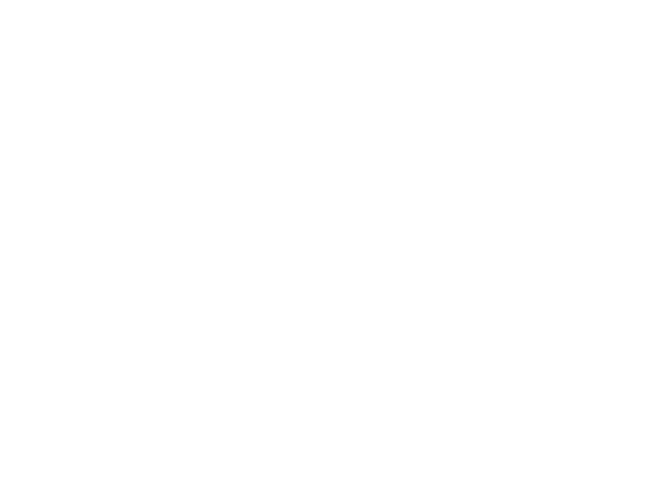

In [6]:
import networkx as nx
from matplotlib import pyplot as plt

#Create different types of graphs
G = nx.Graph()  #Undirected Graph
DG = nx. DiGraph() #Directed Graph

# Basic Visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

Nodes can be added individually or in groups Edges connect existing nodes. Can add metadata to both nodes and edges to show how to build graph incrementally

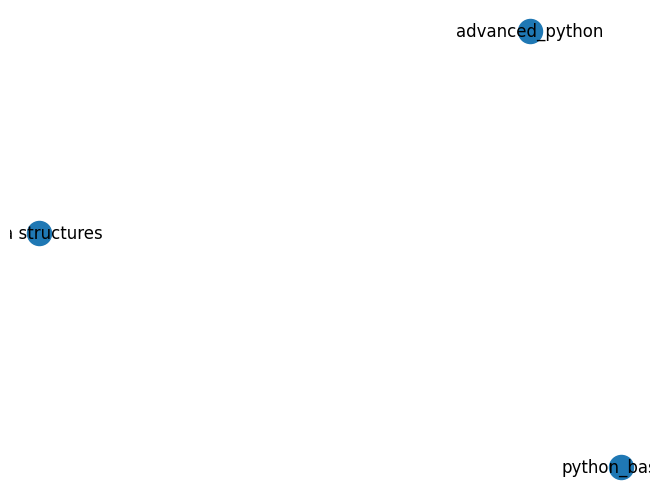

In [7]:
# Adding nodes
G.add_node('python_basics')

G.add_nodes_from(['data structures','advanced_python'])

#basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

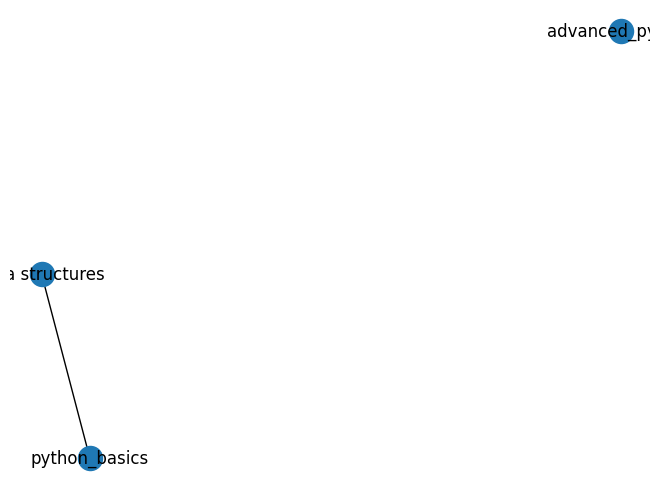

In [8]:
#Adding edges
G.add_edge('python_basics','data structures')
#basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

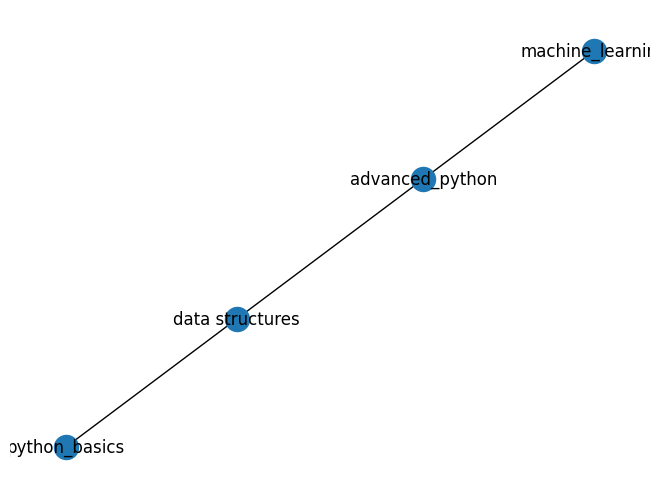

In [9]:
G.add_edges_from([('advanced_python', 'machine_learning'),('data structures','advanced_python')])
#basic visualization
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
plt.show()

attributes make a graph into a knowledge graph. Can add any type of metadata attributes can be added during or after creation.  Makes graph more meaningful and useful

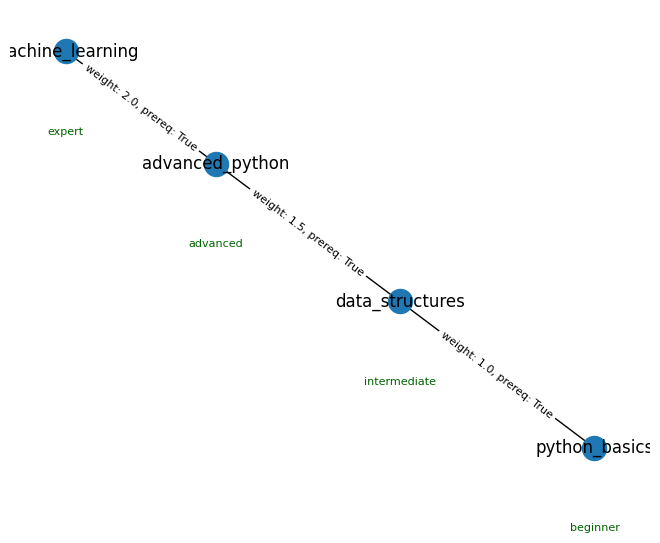

In [15]:
# Node attributes
# Initialize an empty graph
G = nx.Graph()

topics = {
    'python_basics': {'difficulty': 'beginner', 'description': 'Basic Python concepts'},
    'data_structures': {'difficulty': 'intermediate', 'description': 'Data structures in Python'},
    'advanced_python': {'difficulty': 'advanced', 'description': 'Advanced Python techniques'},
    'machine_learning': {'difficulty': 'expert', 'description': 'Introduction to ML'}
}

for node, attrs in topics.items():
   G.add_node(node)
   G.nodes[node].update(attrs)

# Edge attributes
edge_attributes = {
    ('python_basics', 'data_structures'): {'weight': 1.0, 'prerequisite': True},
    ('data_structures', 'advanced_python'): {'weight': 1.5, 'prerequisite': True},
    ('advanced_python', 'machine_learning'): {'weight': 2.0, 'prerequisite': True}
}

for edge, attrs in edge_attributes.items():
    G.add_edge(edge[0], edge[1]) # Add the edge to the graph
    G.edges[edge].update(attrs) # Now update its attributes



# Visualization
pos = nx.spring_layout(G)

# Draw nodes and edges
nx.draw(G, pos, with_labels=True)

# Add node attributes with an offset
node_labels = {node: data['difficulty'] for node, data in G.nodes(data=True)}
for node, (x, y) in pos.items():
    plt.text(x, y - 0.05, node_labels[node], fontsize=8, ha='center', color='darkgreen')

# Add edge attributes as labels
edge_labels = {(u, v): f"weight: {d['weight']}, prereq: {d['prerequisite']}"
               for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.show()


# Let us Build a Learning Path
